In [172]:
# %matplotlib inline
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchsummary import summary
from collections import OrderedDict
import json
import torchvision.transforms as transforms



In [173]:
def image_preprocess(image_path=None):
    image = Image.open(image_path)
    normalize = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = normalize(image).unsqueeze(0)
    return image

In [174]:
def adjust(inp):
    if torch.is_tensor(inp):
        inp=inp.numpy()
    inp = (inp-np.min(inp))/(np.max(inp)-np.min(inp))
    inp*=255
    inp= inp.astype(int)
    return inp

In [175]:
alexnet = models.alexnet(pretrained = True)

c:\Users\sumon\miniconda3\envs\smai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sumon\miniconda3\envs\smai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [176]:
with open('labels.json', 'r') as f:
    labels = json.load(f)

tensor([919]) tensor([24.8580]) street sign


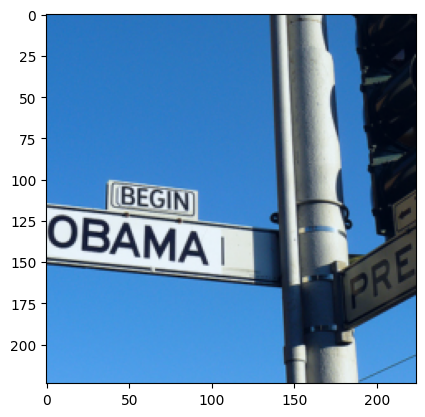

In [177]:
input_tensor = image_preprocess('images/2.jpeg')
plt.imshow(adjust(np.transpose(input_tensor[0], (1,2,0))))

with torch.no_grad():
    output = alexnet(input_tensor)

predicted = reversed(np.argsort(output.data[0])[-1:])

print(predicted, output[0][predicted], labels[str(predicted[0].item())])

tensor([258]) tensor([24.0615]) Samoyed, Samoyede


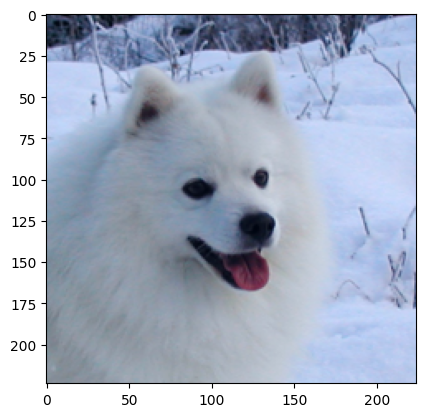

In [178]:
input_tensor2 = image_preprocess('images/3.jpeg')
plt.imshow(adjust(np.transpose(input_tensor2[0], (1,2,0))))

with torch.no_grad():
    output = alexnet(input_tensor2)

predicted = reversed(np.argsort(output.data[0])[-1:])

print(predicted, output[0][predicted], labels[str(predicted[0].item())])

tensor([417]) tensor([36.1630]) balloon


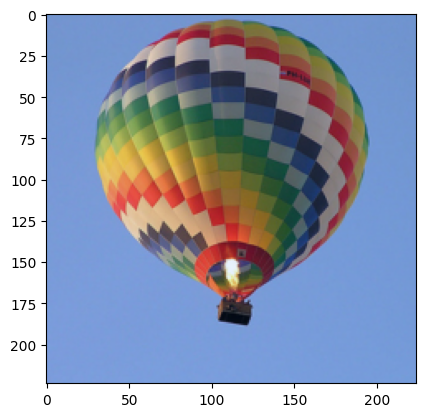

In [179]:
input_tensor3 = image_preprocess('images/30.jpeg')
plt.imshow(adjust(np.transpose(input_tensor3[0], (1,2,0))))

with torch.no_grad():
    output = alexnet(input_tensor3)

predicted = reversed(np.argsort(output.data[0])[-1:])

print(predicted, output[0][predicted], labels[str(predicted[0].item())])

In [180]:
#867

#258
import torch.nn.functional as F
image_tensor = input_tensor
target_class = 258
loss_against = np.asarray([[0.0]*1000])
loss_against[0][258] = 100
loss_against = torch.tensor(loss_against)
# Set up loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Generate targeted adversarial example using FGSM
max_iterations = 1000
step_size = 0.01
for i in range(max_iterations):
    image_tensor.requires_grad = True
    output = alexnet(image_tensor)
    loss = loss_fn(output, loss_against)
    alexnet.zero_grad()
    loss.backward()
    perturbation = step_size * image_tensor.grad.sign()
    perturbed_image = image_tensor - perturbation
    perturbed_output = alexnet(perturbed_image)
    perturbed_prediction = reversed(np.argsort(output.data[0])[-1:])
    if output[0][perturbed_prediction] > 20 and perturbed_prediction == target_class:
        break
    else:
        image_tensor = perturbed_image.detach()  

output = alexnet(perturbed_image)

predicted = reversed(np.argsort(output.data[0])[-1:])

print(predicted, output[0][predicted], labels[str(predicted[0].item())])
p1 = perturbed_image

tensor([258]) tensor([18.8693], grad_fn=<IndexBackward0>) Samoyed, Samoyede


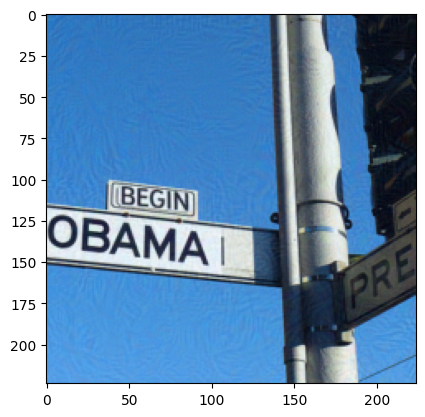

In [181]:
plt.imshow(adjust(np.transpose(p1.detach()[0], (1,2,0))))

In [182]:
#867

#258
import torch.nn.functional as F
image_tensor = input_tensor3
target_class = 258
loss_against = np.asarray([[0.0]*1000])
loss_against[0][258] = 100
loss_against = torch.tensor(loss_against)
# Set up loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Generate targeted adversarial example using FGSM
max_iterations = 1000
step_size = 0.01
for i in range(max_iterations):
    image_tensor.requires_grad = True
    output = alexnet(image_tensor)
    loss = loss_fn(output, loss_against)
    alexnet.zero_grad()
    loss.backward()
    perturbation = step_size * image_tensor.grad.sign()
    perturbed_image = image_tensor - perturbation
    perturbed_output = alexnet(perturbed_image)
    perturbed_prediction = reversed(np.argsort(output.data[0])[-1:])
    if output[0][perturbed_prediction] > 20 and perturbed_prediction == target_class:
        break
    else:
        image_tensor = perturbed_image.detach()  

output = alexnet(perturbed_image)

predicted = reversed(np.argsort(output.data[0])[-1:])

print(predicted, output[0][predicted], labels[str(predicted[0].item())])
p2 = perturbed_image

tensor([258]) tensor([14.5942], grad_fn=<IndexBackward0>) Samoyed, Samoyede


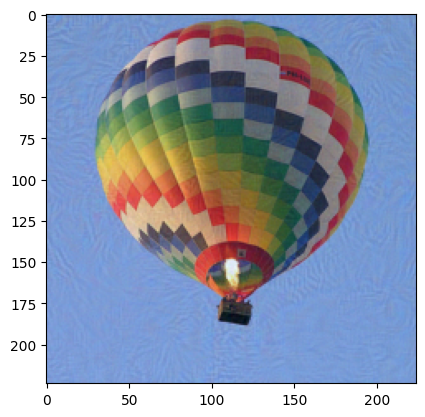

In [183]:
plt.imshow(adjust(np.transpose(p2.detach()[0], (1,2,0))))

In [ ]:
img = torch.tensor([np.transpose(np.load("modiff_img.npy"), (2, 0, 1))])
with torch.no_grad():
    output = alexnet(img)

predicted = reversed(np.argsort(output.data[0])[-1:])

print(predicted, output[0][predicted], labels[str(predicted[0].item())])

In [185]:
np.save('modiff_1.npy', np.transpose(p1.detach()[0], (1,2,0)).numpy())
np.save('modiff_2.npy', np.transpose(p2.detach()[0], (1,2,0)).numpy())